#### Analise Exploratória em conjunto de dados do kaggle

In [1]:
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")
%matplotlib inline

In [4]:
# Dataset
df = pd.read_csv('autos.csv', encoding="latin-1")

In [5]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


C:\Users\jon_j\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


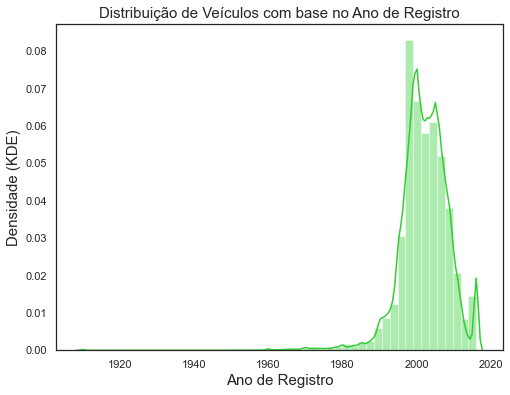

In [6]:
# Plot com a Distribuição de Veículos com base no Ano de Registro
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["yearOfRegistration"], color="#33cc33",kde=True, ax=ax)
ax.set_title('Distribuição de Veículos com base no Ano de Registro', fontsize= 15)
plt.ylabel("Densidade (KDE)", fontsize= 15)
plt.xlabel("Ano de Registro", fontsize= 15)
plt.show()

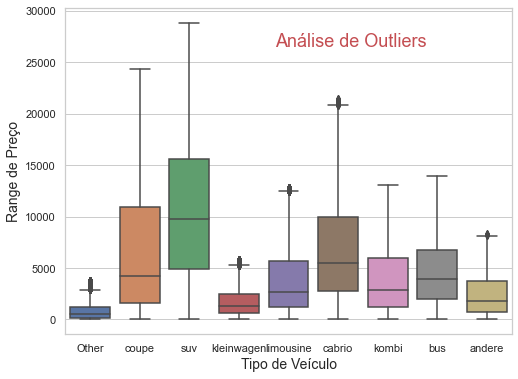

In [7]:
# Boxplot para avaliar os outliers
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="vehicleType", y="price", data=df)
ax.text(5.25,27000,"Análise de Outliers",fontsize=18,color="r",ha="center", va="center")
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':14})
ax.yaxis.set_label_text("Range de Preço",fontdict= {'size':14})
plt.show()

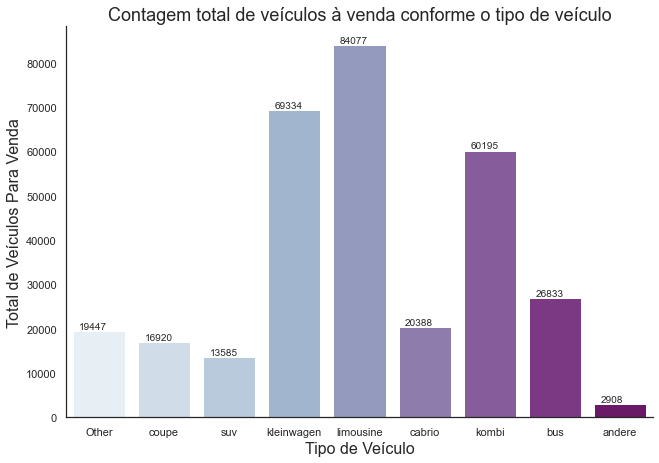

In [8]:
# Plot que mostra o número de veículos pertencentes a cada categoria 
sns.set_style("white")
g = sns.catplot(x="vehicleType", data=df, kind="count", palette="BuPu", height=6, aspect=1.5)
g.ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total de Veículos Para Venda", fontdict= {'size':16})
g.ax.set_title("Contagem total de veículos à venda conforme o tipo de veículo",fontdict= {'size':18})
# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

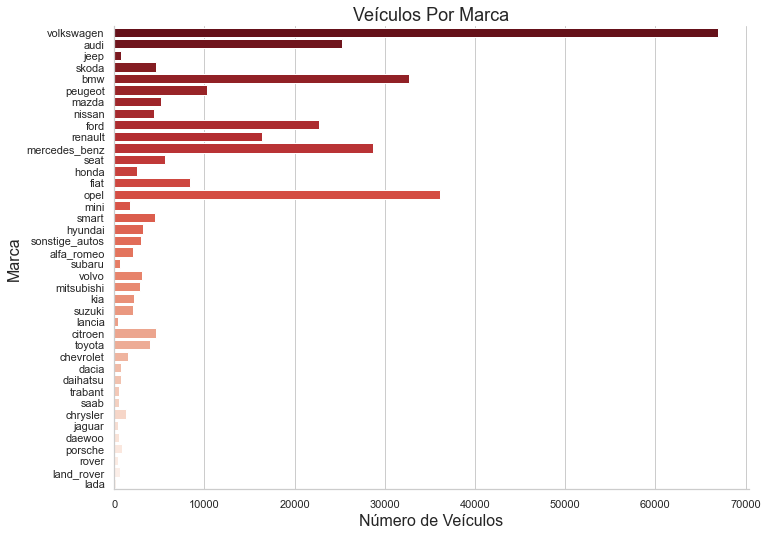

In [9]:
# Plot que mostra o número de veículos pertencentes a cada marca
sns.set_style("whitegrid")
g = sns.catplot(y="brand", data=df, kind="count", palette="Reds_r", height=7, aspect=1.5)
g.ax.set_title("Veículos Por Marca",fontdict={'size':18})
g.ax.xaxis.set_label_text("Número de Veículos",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Marca",fontdict= {'size':16})
plt.show()

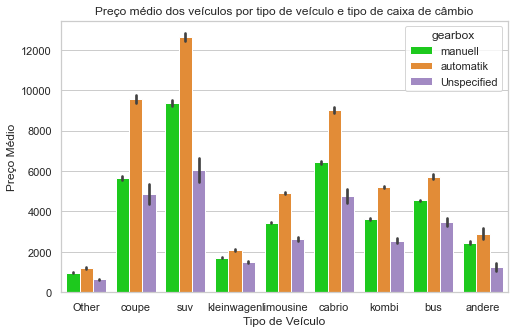

In [10]:
# Plot com o Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="vehicleType", y="price",hue="gearbox", palette=colors, data=df)
ax.set_title("Preço médio dos veículos por tipo de veículo e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':12})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':12})
plt.show()

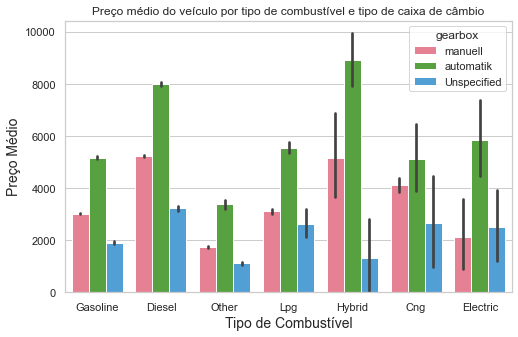

In [11]:
# Barplot com o Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="fuelType", y="price",hue="gearbox", palette="husl",data=df)
ax.set_title("Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Combustível",fontdict= {'size':14})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':14})
plt.show()

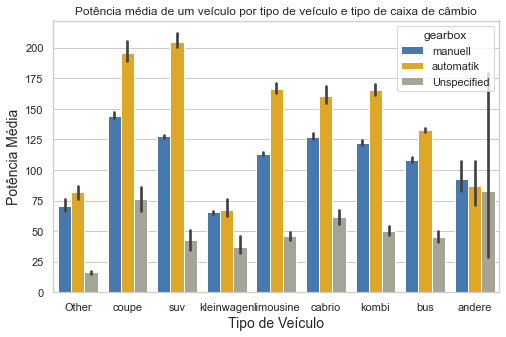

In [12]:
# Barplot com a Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
fig, ax = plt.subplots(figsize=(8,5))
sns.set_palette(sns.xkcd_palette(colors))
sns.barplot(x="vehicleType", y="powerPS",hue="gearbox",data=df)
ax.set_title("Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':14})
ax.yaxis.set_label_text("Potência Média",fontdict= {'size':14})
plt.show()

In [13]:
# Média de preço por marca e por veículo
trial = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(5)

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


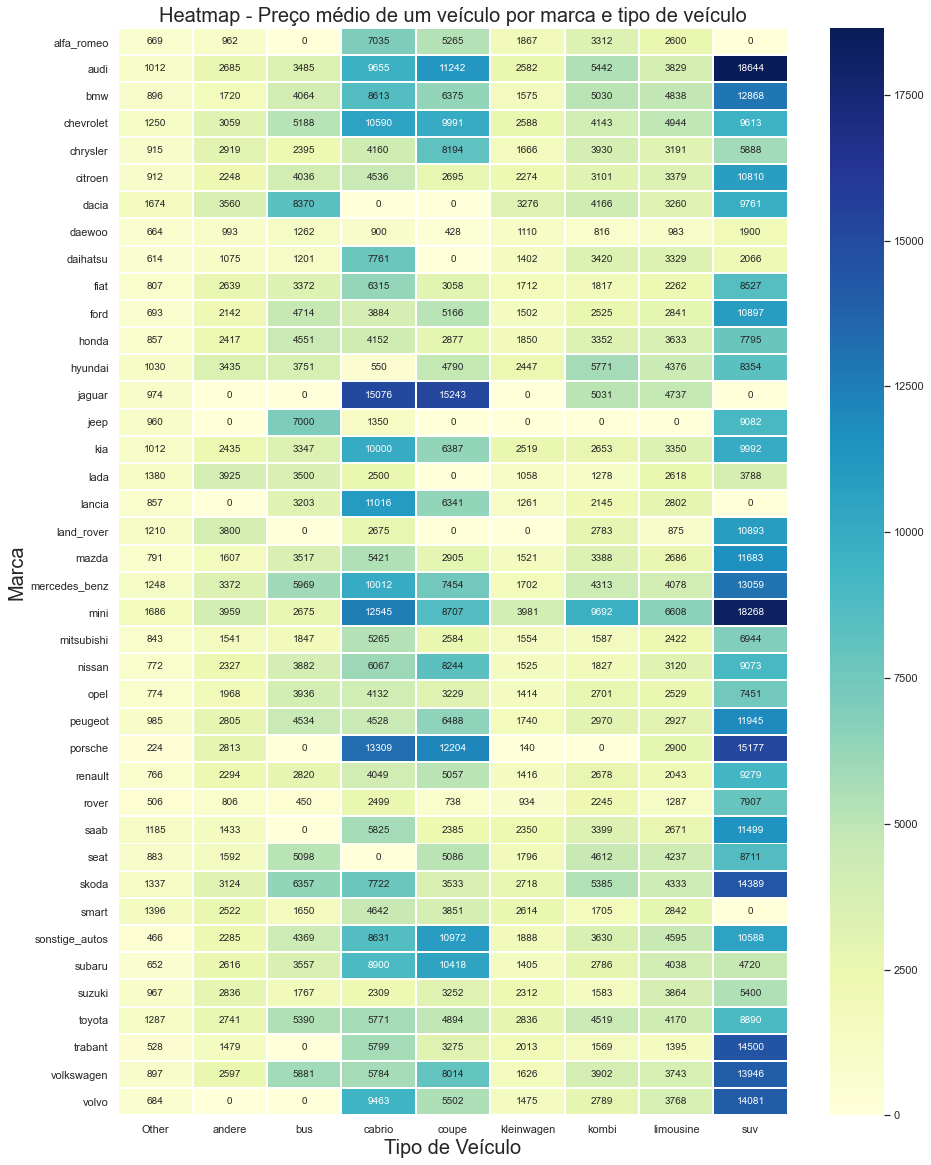

In [14]:
# Heatmap com Preço médio de um veículo por marca, bem como tipo de veículo
tri = trial.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Heatmap - Preço médio de um veículo por marca e tipo de veículo",fontdict={'size':20})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':20})
ax.yaxis.set_label_text("Marca",fontdict= {'size':20})
plt.show()